In [1]:
# RNN 사용 패키지
from tensorflow.keras.datasets import imdb

In [10]:
# IMDB 데이터 읽어 들이기
# num_words : 말뭉치 500개를 기준으로 함
# 전체 데이터셋에서 가장 자주 등장하는 말뭉치 단어 상위 500개를 사용
# 말뭉치 500개를 기준으로 각 데이터 샘플 내 단어와 매칭하여 훈련/테스트 데이터를 반환해줌
# 말뭉치 500개는 훈련시에도 사용됨
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [11]:
# train 및 test 데이터셋에는 각 25,000개씩 문장들이 들어있음
# 문장은 감상평을 입력한 내용에 대한 데이터
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(25000,) (25000,)
(25000,) (25000,)


In [4]:
train_input

array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 

In [5]:
train_input[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,


In [12]:
# 데이터들의 길이가 같은지 다른지 확인
# 0,1번째 데이터 확인
print("길이= ", len(train_input[0]))
print("길이= ", len(train_input[1]))

길이=  218
길이=  189


In [13]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

print(train_input.shape,train_target.shape)
print(val_input.shape,val_target.shape)

(20000,) (20000,)
(5000,) (5000,)


In [14]:
# 정규화
# 데이터(문장=샘플)의 개수를 통일시키기
# 평군, 중간값, 최소, 최대 길이 확인해 정규화 가능
# 평균과 중간값을 이용
import numpy as np

# train_input 데이터의 각 데이터의 길이를 넘파이 배열로 추출하기
lengths = np.array([len(x) for x in train_input])
lengths.shape

(20000,)

In [15]:
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [17]:
# 추출한 길이 데이터를 이용해서 평균과 중앙값 확인
print("평균 : ", np.mean(lengths), "중앙값 : ",np.median(lengths))
# 해석
# 중앙값이 평균값보다 작다는 것은 왼쪽으로 편중되어있다는 의미

평균 :  239.00925 중앙값 :  178.0


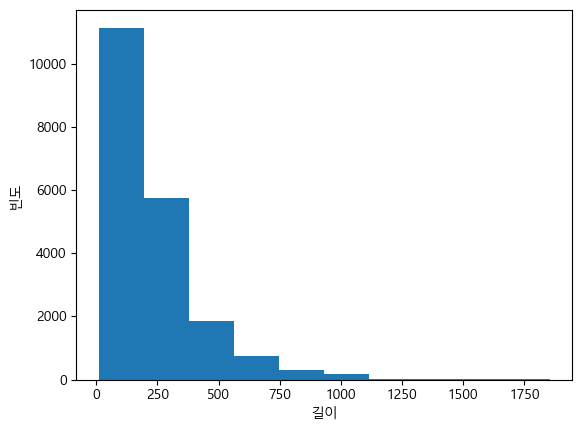

In [18]:
# 그래프로 시각화 해보기
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글처리
plt.rc("font", family="Malgun Gothic")
plt.hist(lengths)
plt.xlabel("길이")
plt.ylabel("빈도")
plt.show()

In [20]:
# 각 데이터 문장은 100개의 단어로 통일시키기(정규화)
from tensorflow.keras.preprocessing.sequence import pad_sequences
# pad_sequences : 각 데이터의 단어 개수가 maxlen의 값보다 큰 경우 잘라내기
# 특정 데이터의 단어 개수가 maxlen보다 작다면 단어가 있는 부분은 추출, 작은 공간은 0으로 100을 맞춰 채움
train_seq = pad_sequences(train_input, maxlen=100)
print(train_input.shape,train_seq.shape)

(20000,) (20000, 100)


In [22]:
train_seq

array([[ 10,   4,  20, ...,  10, 470, 158],
       [206,   2,  26, ...,   6,   2,   2],
       [  2,   7,   2, ...,   2,   2,  12],
       ...,
       [  2,  37, 299, ...,   7,  14,   2],
       [  0,   0,   0, ...,  25, 170,   2],
       [  0,   0,   0, ...,  25, 194,   2]])

In [23]:
#  검증데이터도 정규화
val_seq = pad_sequences(val_input, maxlen=100)
print(val_input.shape,val_seq.shape)

(5000,) (5000, 100)


In [24]:
# 뒷쪽 단어 자르기
# truncating : 자르는 위치 지정
# pre : 앞쪽 자르기(기본값)
# post : 뒷쪽 자르기
# 단어의 길이가 maxlen보다 작은 경우 해당없음
# padding: 0으로 채우는 위치 지정
# pre : 앞쪽 채우기(기본값), post : 뒷쪽 채우기
train_seq = pad_sequences(train_input,maxlen=100,truncating="post")
# 보틍은 앞쪽을 자른다

In [25]:
from tensorflow import keras
# 모델 생성
model = keras.Sequential()

In [26]:
# 은닉층 추가 
# RNN 계층 추가하기
# 100 : 데이터 각각의 컴럼(단어) 개수
# 500 : 500개의 말뭉치와 비교한 원-핫 인코딩 데이터가 들어감
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))

# 출력층 추가
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [27]:
train_seq.shape

(20000, 100)

In [28]:
# 가장 많이 사용되는 단어들을 말뭉치에서 확인하기 위해 원-핫 인코딩하기
# 각 데이터(문장) 내에서 가장 많이 사용된 단어를 1로 처리
# 나머지는 모두 0으로 처리
train_oh = keras.utils.to_categorical(train_seq)
train_oh.shape

(20000, 100, 500)

In [29]:
train_oh

array([[[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [30]:
# 검증 데이터도 원-핫 인코딩 처리
val_oh = keras.utils.to_categorical(val_seq)
val_oh.shape

(5000, 100, 500)

In [31]:
model.summary()
# param 값 계산
# 4072 = 500 (원핫) * 8(뉴런 출력개수) + 8(은닉상태크기) * 8(뉴런출력개수) + 8(절편개수)
# 9 = 8(뉴런입력개수) + 1(뉴런출력개수)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 모델 생성하기 : 컴파일
# 최적화 알고리즘(옵티마이저) 정의
# 순환신경망에서는 일반적으로 RMSprop을 주로 사용
# learning_rate : 보폭
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop,
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [33]:
# 콜백 함수
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best_simplernn_model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

In [34]:
# 모델 훈련 시키기
# 반복 100번으로 생성
# batch_size : target값과 비교할 데이터 개수 지정, 개수는 사용하는 데이터 개수보다 작게 지정
history = model.fit(train_oh,train_target,epochs=100,batch_size=64,validation_data=(val_oh,val_target),
         callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 14ms/step - loss: 0.7015 - accuracy: 0.5033 - val_loss: 0.7033 - val_accuracy: 0.4950
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6979 - accuracy: 0.5064 - val_loss: 0.7009 - val_accuracy: 0.4928
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6957 - accuracy: 0.5109 - val_loss: 0.6994 - val_accuracy: 0.4904
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6940 - accuracy: 0.5156 - val_loss: 0.6983 - val_accuracy: 0.4960
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6927 - accuracy: 0.5203 - val_loss: 0.6974 - val_accuracy: 0.4936
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6915 - accuracy: 0.5243 - val_loss: 0.6969 - val_accuracy: 0.4970
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6905 - accuracy: 0.5283 - val_loss: 0.6963 - val_accuracy:

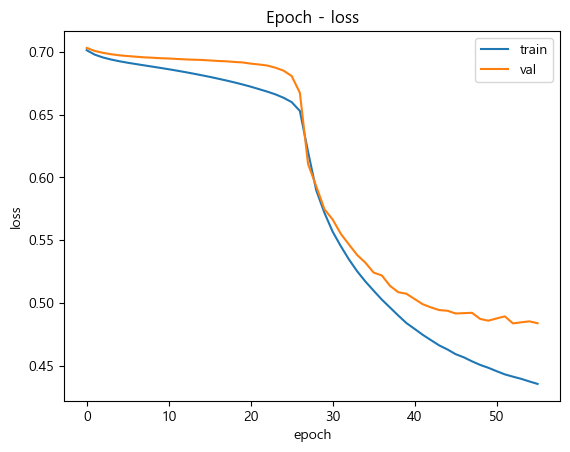

In [35]:
# 훈련 검증 손실 곡선 
# history 결과를 이용하여 손실곡선 그리기
# 훈련 손실과 검증 손실 비교
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["loss"],label="train")
plt.plot(history.epoch, history.history["val_loss"],label="val")
plt.title("Epoch - loss")
plt.xlabel("epoch")
plt.ylabel("loss")


plt.legend()
plt.show()

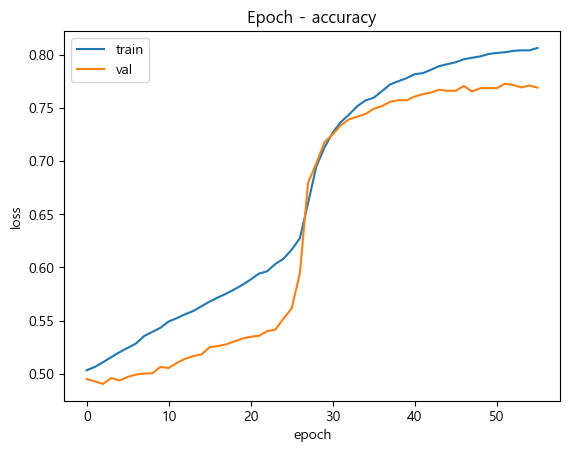

In [36]:
# 정확도 곡선
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["accuracy"],label="train")
plt.plot(history.epoch, history.history["val_accuracy"],label="val")
plt.title("Epoch - accuracy")
plt.xlabel("epoch")
plt.ylabel("loss")


plt.legend()
plt.show()

In [39]:
# 단어 임베딩 방식
# 모델 생성
model2 = keras.Sequential()

# 계층 추가
# 단어임베딩 레이어 추가
# 500 : 주요 단어 500개
# 16 : 단어 임베딩 벡터
# 100 : 입력 데이터
# 사용데이터 : train_seq, val_seq
model2.add(keras.layers.Embedding(500,16,input_length=100))

# 순환신경망 추가
model2.add(keras.layers.SimpleRNN(8))

# 출력층 추가
model2.add(keras.layers.Dense(1, activation="sigmoid"))

# 컴파일
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop,
             loss="binary_crossentropy",
             metrics=["accuracy"])

# 콜백 함수
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best_embedding_model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

# 훈련
history2 = model2.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),
         callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6949 - accuracy: 0.5072 - val_loss: 0.6942 - val_accuracy: 0.4958
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6839 - accuracy: 0.5735 - val_loss: 0.6758 - val_accuracy: 0.6136
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 0.6627 - accuracy: 0.6456 - val_loss: 0.6631 - val_accuracy: 0.6230
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6402 - accuracy: 0.6791 - val_loss: 0.6501 - val_accuracy: 0.6376
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 0.6155 - accuracy: 0.7061 - val_loss: 0.6247 - val_accuracy: 0.6726
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 0.5916 - accuracy: 0.7272 - val_loss: 0.5916 - val_accuracy: 0.7148
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 0.5702 - accuracy: 0.7426 - val_loss: 0.5691 - val_accuracy: 0.7306

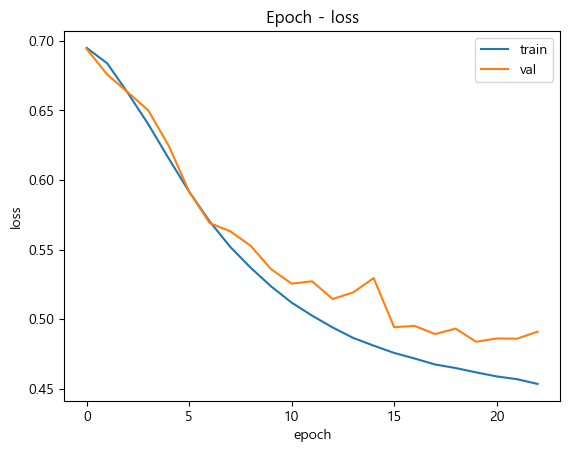

In [40]:
# 훈련 검증 손실 곡선 
# history 결과를 이용하여 손실곡선 그리기
# 훈련 손실과 검증 손실 비교
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["loss"],label="train")
plt.plot(history.epoch, history.history["val_loss"],label="val")
plt.title("Epoch - loss")
plt.xlabel("epoch")
plt.ylabel("loss")


plt.legend()
plt.show()

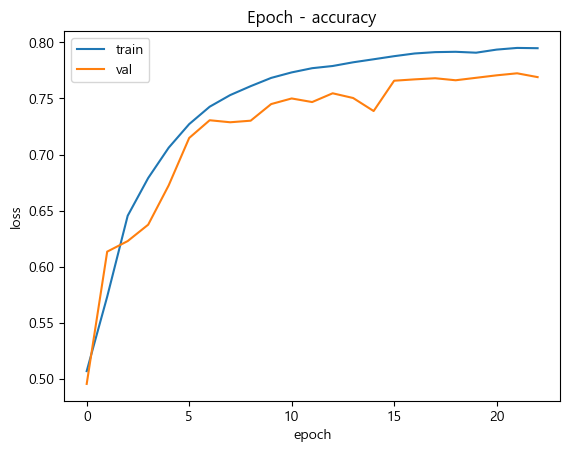

In [41]:
# 정확도 곡선
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["accuracy"],label="train")
plt.plot(history.epoch, history.history["val_accuracy"],label="val")
plt.title("Epoch - accuracy")
plt.xlabel("epoch")
plt.ylabel("loss")


plt.legend()
plt.show()